# Real-Time object Detection with MobileNet SSD

__Introduction to MobileNet & SSD:__
<br>
<br>
__MobileNet__ is a light-weight deep neural network architecture designed for mobiles and embedded vision applications.
<br>
__Single Shot object detection__ or SSD takes one single shot to detect multiple objects within the image.
<br>
The SSD approach is based on a feed-forward convolutional network that produces a fixed-size collection of bounding boxes and scores for the presence of object class instances in those boxes.
<br>

In [1]:
#import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the pre-trained neural network
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')

In [3]:
##List of categories and classes
categories = { 0: 'background', 1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat', 
              9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 
              16: 'pottedplant', 17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor'}
# defined in list also
classes =  ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", 
            "diningtable",  "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

In [4]:
# change image name to check different results
image = cv2.imread('image_2.jpeg')
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()
colors = np.random.uniform(255, 0, size=(len(categories), 3))
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence >0.2:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        label = "{}: {:.2f}%".format(classes[idx], confidence * 100) 
        cv2.rectangle(image, (startX, startY), (endX, endY), colors[idx], 2)     
        y = startY - 15 if startY - 15>15 else startY + 15     
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
cv2.imshow("Output", image)
cv2.waitKey(5000)
cv2.destroyAllWindows()

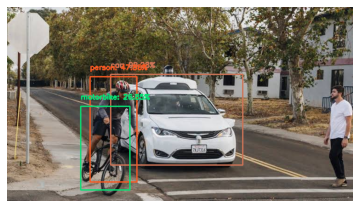

In [5]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
# ax1.set_title('object detection')
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
filename = 'edmonton_canada.mp4'
file_size = (1920,1080) # Assumes 1920x1080 mp4
# We want to save the output to a video file
output_filename = 'edmonton_canada_obj_detect_mobssd.mp4'
output_frames_per_second = 20.0
RESIZED_DIMENSIONS = (300, 300) # Dimensions that SSD was trained on. 
IMG_NORM_RATIO = 0.007843 # In grayscale a pixel can range between 0 and 255
# Load the pre-trained neural network
neural_network = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 
        'MobileNetSSD_deploy.caffemodel')

In [9]:
# Create the bounding boxes
bbox_colors = np.random.uniform(255, 0, size=(len(categories), 3))
def main():
    cap = cv2.VideoCapture(filename)# Load a video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')# Create a VideoWriter object so we can save the video output
    result = cv2.VideoWriter(output_filename,fourcc,output_frames_per_second,file_size)
    # Process the video
    while cap.isOpened():     
        # Capture one frame at a time
        success, frame = cap.read() 
        if success:  
            # Capture the frame's height and width
            (h, w) = frame.shape[:2]
            # Create a blob. A blob is a group of connected pixels in a binary 
            # frame that share some common property (e.g. grayscale value)
            # Preprocess the frame to prepare it for deep learning classification
            frame_blob = cv2.dnn.blobFromImage(cv2.resize(frame, RESIZED_DIMENSIONS),IMG_NORM_RATIO, RESIZED_DIMENSIONS, 127.5)
            # Set the input for the neural network
            neural_network.setInput(frame_blob)
            # Predict the objects in the image
            neural_network_output = neural_network.forward()
            # Put the bounding boxes around the detected objects
            for i in np.arange(0, neural_network_output.shape[2]):     
                confidence = neural_network_output[0, 0, i, 2]
                # Confidence must be at least 30%       
                if confidence > 0.30:       
                    idx = int(neural_network_output[0, 0, i, 1])
                    bounding_box = neural_network_output[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = bounding_box.astype("int")
                    label = "{}: {:.2f}%".format(classes[idx], confidence * 100) 
                    cv2.rectangle(frame, (startX, startY),(endX, endY), bbox_colors[idx], 2)     
                    y = startY - 15 if startY - 15 > 15 else startY + 15    
                    cv2.putText(frame, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX,0.5, bbox_colors[idx], 2)  
            # We now need to resize the frame so its dimensions
            # are equivalent to the dimensions of the original frame
            frame = cv2.resize(frame, file_size, interpolation=cv2.INTER_NEAREST)
            # Write the frame to the output video file
            result.write(frame)    
        else:
            break           
    # Stop when the video is finished
    cap.release()   
    # Release the video recording
    result.release()
main()